In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import timeit
from emcee.autocorr import *
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 250
batch_size = 50
niters = 10000
t_dist = Rosenbrock()

##### Not using ensemble, use isotropic gaussian proposal with scale=0.2

finishes in about 4.93 seconds
avg accept rate: 53.71%
The chain is too short to reliably estimate the autocorrelation time


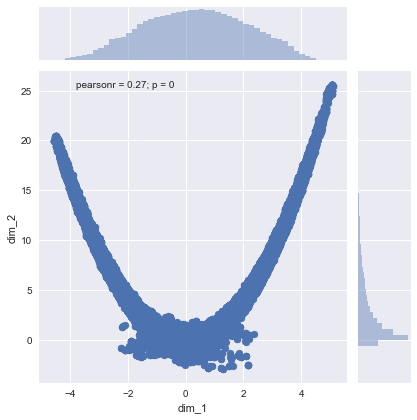

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=batch_size, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
try:
    print 'auto-correlation time: %s' % hist.auto_corr()
except AutocorrError, err:
    print err

#### Use ensemble of size 3, scale=0.2.

finishes in about 10.33 seconds
avg accept rate: 51.90%
The chain is too short to reliably estimate the autocorrelation time


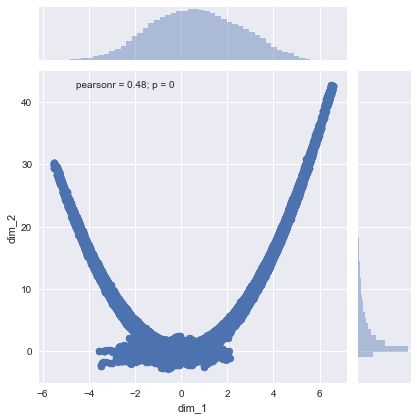

In [9]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=batch_size, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
try:
    print 'auto-correlation time: %s' % hist.auto_corr()
except AutocorrError, err:
    print err

#### Ensemble with pCN, beta=0.4   
This could come from the theory behind pCN sampling, i.e. it preserves the underlying Gaussian measure.

finishes in about 9.34 seconds
avg accept rate: 87.85%
auto-correlation time: [ 46.43437286  23.70454749]


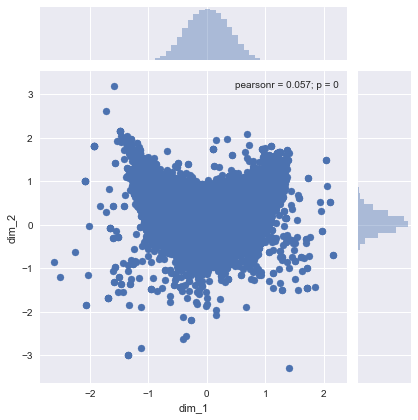

In [10]:
proposal = PCNWalkMove(s=3, beta=0.4, symmetric=True)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=batch_size, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
try:
    print 'auto-correlation time: %s' % hist.auto_corr()
except AutocorrError, err:
    print err

#### Ensemble with pCN, start from the end position of isotropic gaussian proposal

In [11]:
niter = 1000
proposal = PCNWalkMove(s=None, scale=0.2, symmetric=True)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
p0 = sampler.run_mcmc(niter, batch_size=batch_size, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim])).curr_pos

finishes in about 9.62 seconds
avg accept rate: 85.64%
auto-correlation time: [ 80.39782403  75.58391352]


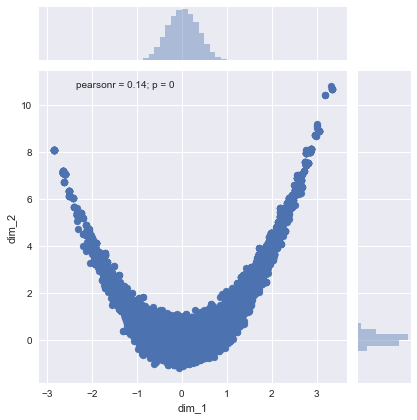

In [12]:
sampler.reset()
sampler.proposal.s = 3
sampler.proposal.beta = 0.5

start = timeit.default_timer()
hist = sampler.run_mcmc(niters-niter, batch_size=batch_size, p0=p0)
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)

hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
try:
    print 'auto-correlation time: %s' % hist.auto_corr()
except AutocorrError, err:
    print err

#### pCN without ensemble, beta=0.4  
Check affine invariance of pCN. Notice this does not totally make sense.

finishes in about 7.46 seconds
avg accept rate: 52.27%
auto-correlation time: [ 52.54125259  36.44000928]


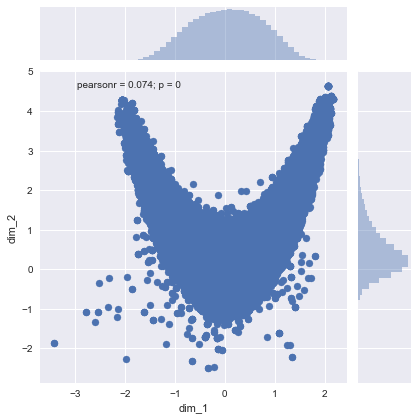

In [13]:
proposal = PCNWalkMove(s=None, beta=0.4)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = timeit.default_timer()
hist = sampler.run_mcmc(niters, batch_size=batch_size, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print 'finishes in about %.2f seconds' % float(timeit.default_timer() - start)
hist.plot_scatter(dim=[[0, 1]])
print 'avg accept rate: %.2f%s' % (float(100*hist.acceptance_rate.mean()), '%')
try:
    print 'auto-correlation time: %s' % hist.auto_corr()
except AutocorrError, err:
    print err